In [16]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [17]:
!git clone https://github.com/ironhack-labs/project-nlp-challenge

fatal: destination path 'project-nlp-challenge' already exists and is not an empty directory.


In [18]:
df = pd.read_csv("/content/project-nlp-challenge/dataset/data.csv")
df.head()

,label,title,text,subject,date
0,1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,1,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,1,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [19]:
# Download NLTK dependencies (if not already installed)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 label      0
title      0
text       0
subject    0
date       0
dtype: int64


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39942 entries, 0 to 39941
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    39942 non-null  int64 
 1   title    39942 non-null  object
 2   text     39942 non-null  object
 3   subject  39942 non-null  object
 4   date     39942 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


In [22]:
print("\nDuplicated Values:\n", df.duplicated().sum())


Duplicated Values:
 201


In [23]:
df = df.drop_duplicates()
print("Duplicates Removed!")

Duplicates Removed!


In [24]:
print("\nDuplicated Values:\n", df.duplicated().sum())


Duplicated Values:
 0


In [25]:
# Convert text to lowercase
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text inside brackets
    text = re.sub(r"https?://\S+|www\.\S+", '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove newlines
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words with numbers
    return text

In [26]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [27]:
# Apply text cleaning function
df["cleaned_text"] = df["text"].apply(lambda x: clean_text(x))

# Tokenization (Splitting text into words)
df["tokens"] = df["cleaned_text"].apply(lambda x: word_tokenize(x))

In [28]:
# Stopword Removal
stop_words = set(stopwords.words("english"))
df["tokens"] = df["tokens"].apply(lambda x: [word for word in x if word not in stop_words])

# Stemming (Reducing words to root form)
stemmer = PorterStemmer()
df["stemmed_text"] = df["tokens"].apply(lambda x: [stemmer.stem(word) for word in x])

# Lemmatization (Better than stemming)
lemmatizer = WordNetLemmatizer()
df["lemmatized_text"] = df["tokens"].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Convert tokenized words back to full text
df["final_text"] = df["lemmatized_text"].apply(lambda x: " ".join(x))

In [29]:
# Display cleaned dataset
print("\nData Preprocessing Complete! Here’s a sample of the cleaned data:")
df.head()


Data Preprocessing Complete! Here’s a sample of the cleaned data:


,label,title,text,subject,date,cleaned_text,tokens,stemmed_text,lemmatized_text,final_text
0,1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",washington reuters the head of a conservative...,"[washington, reuters, head, conservative, repu...","[washington, reuter, head, conserv, republican...","[washington, reuters, head, conservative, repu...",washington reuters head conservative republica...
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",washington reuters transgender people will be...,"[washington, reuters, transgender, people, all...","[washington, reuter, transgend, peopl, allow, ...","[washington, reuters, transgender, people, all...",washington reuters transgender people allowed ...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",washington reuters the special counsel invest...,"[washington, reuters, special, counsel, invest...","[washington, reuter, special, counsel, investi...","[washington, reuters, special, counsel, invest...",washington reuters special counsel investigati...
3,1,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",washington reuters trump campaign adviser geo...,"[washington, reuters, trump, campaign, adviser...","[washington, reuter, trump, campaign, advis, g...","[washington, reuters, trump, campaign, adviser...",washington reuters trump campaign adviser geor...
4,1,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",seattlewashington reuters president donald tr...,"[seattlewashington, reuters, president, donald...","[seattlewashington, reuter, presid, donald, tr...","[seattlewashington, reuters, president, donald...",seattlewashington reuters president donald tru...


In [30]:
# Save the cleaned dataset
df.to_csv("cleaned_news_dataset.csv", index=False)
print("File Saved: cleaned_news_dataset.csv")

File Saved: cleaned_news_dataset.csv


<ipython-input-31-5c653a7490c2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["label"], palette="pastel")


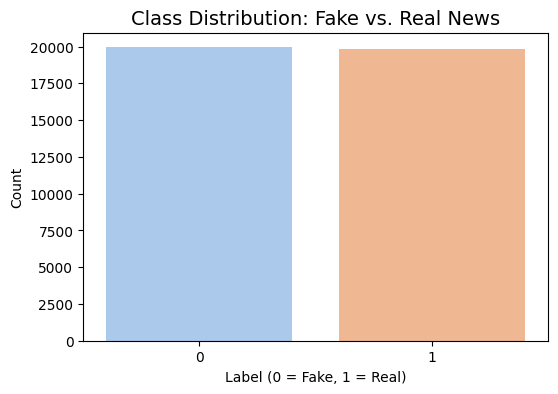

Real News: 19801, Fake News: 19940


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each label
plt.figure(figsize=(6,4))
sns.countplot(x=df["label"], palette="pastel")
plt.title("Class Distribution: Fake vs. Real News", fontsize=14)
plt.xlabel("Label (0 = Fake, 1 = Real)")
plt.ylabel("Count")
plt.show()

# Print count values
real_count = df["label"].value_counts()[1]
fake_count = df["label"].value_counts()[0]
print(f"Real News: {real_count}, Fake News: {fake_count}")


<ipython-input-32-dcebefc61e7b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fake_df["Count"], y=fake_df["Word"], palette="Reds_r")


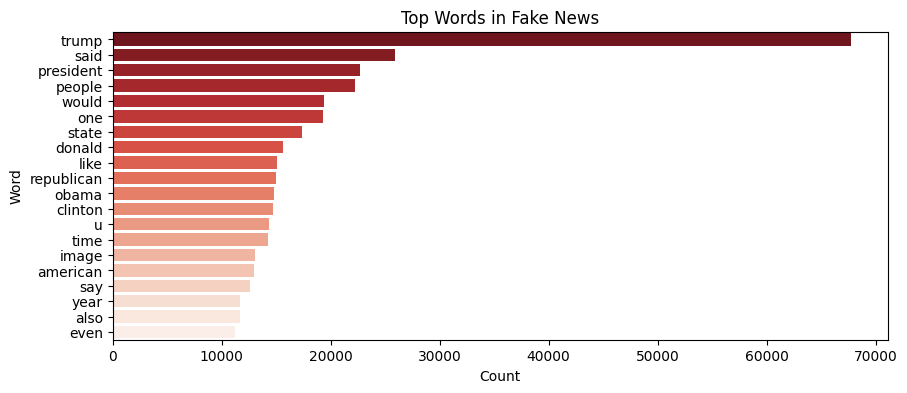

<ipython-input-32-dcebefc61e7b>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=real_df["Count"], y=real_df["Word"], palette="Blues_r")


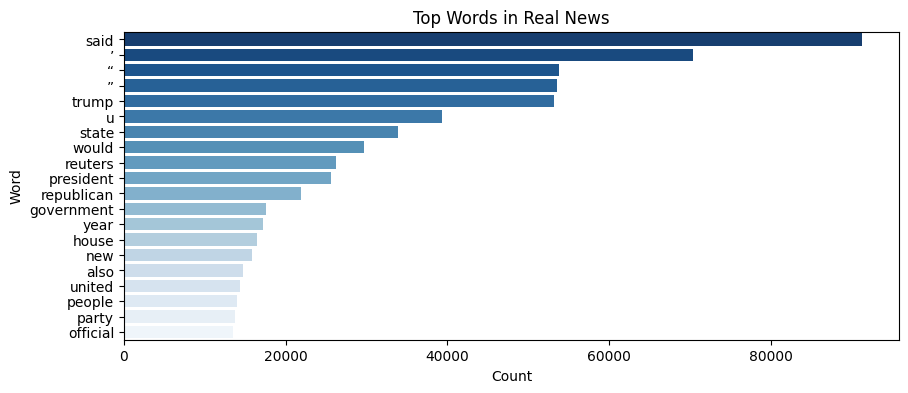

In [32]:
from collections import Counter

# Separate real and fake news
fake_news = df[df["label"] == 0]["final_text"]
real_news = df[df["label"] == 1]["final_text"]

# Function to get most common words
def get_top_words(text_data, n=20):
    words = " ".join(text_data).split()
    return Counter(words).most_common(n)

# Get top words for each category
fake_top_words = get_top_words(fake_news, 20)
real_top_words = get_top_words(real_news, 20)

# Convert to DataFrame for visualization
fake_df = pd.DataFrame(fake_top_words, columns=["Word", "Count"])
real_df = pd.DataFrame(real_top_words, columns=["Word", "Count"])

# Plot top words for Fake News
plt.figure(figsize=(10,4))
sns.barplot(x=fake_df["Count"], y=fake_df["Word"], palette="Reds_r")
plt.title("Top Words in Fake News")
plt.show()

# Plot top words for Real News
plt.figure(figsize=(10,4))
sns.barplot(x=real_df["Count"], y=real_df["Word"], palette="Blues_r")
plt.title("Top Words in Real News")
plt.show()


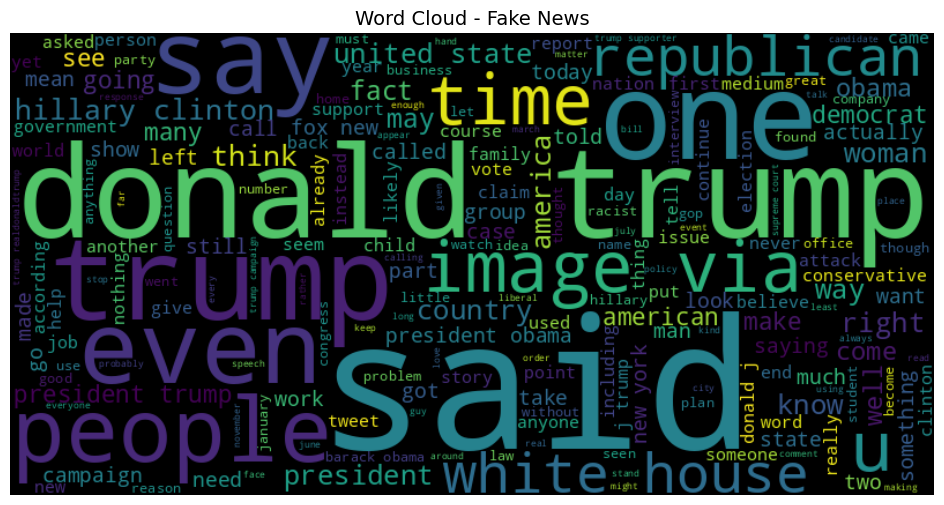

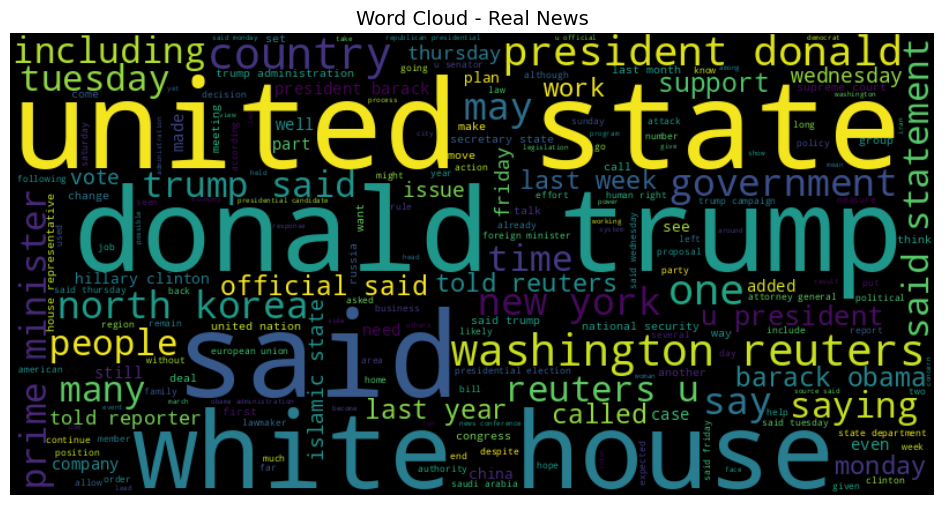

In [33]:
from wordcloud import WordCloud

# Generate Word Cloud for Fake News
fake_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(" ".join(fake_news))

# Generate Word Cloud for Real News
real_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(" ".join(real_news))

# Plot Fake News Word Cloud
plt.figure(figsize=(12,6))
plt.imshow(fake_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Fake News", fontsize=14)
plt.show()

# Plot Real News Word Cloud
plt.figure(figsize=(12,6))
plt.imshow(real_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Real News", fontsize=14)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Define features and labels
X = df["final_text"]  # Processed text
y = df["label"]  # Target (0 = Fake, 1 = Real)

# Split into Train & Test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to top 5000 words

# Fit TF-IDF on training data only
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)  # Transform test data

# Convert to DataFrame for better visualization
tfidf_df_train = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train and evaluate models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

# Fit models and evaluate performance
for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    # Print performance metrics
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


In [34]:
! pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [35]:
import gensim
from gensim.models import Word2Vec

# Convert tokenized text into list of lists
tokenized_texts = df["tokens"].tolist()

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=2, workers=4)

# Save the trained model
word2vec_model.save("word2vec.model")

# Display vector for a sample word
word = "president"  # Change this to any word in your dataset
if word in word2vec_model.wv:
    print(f"\nVector representation for '{word}':\n", word2vec_model.wv[word][:10])  # Display first 10 values
else:
    print(f"\nWord '{word}' not in vocabulary.")

print("\nWord2Vec Model Trained Successfully!")



Vector representation for 'president':
 [ 0.3671847   0.1657745   2.097843    3.0797033  -0.41634542  1.1470486
  0.78266084 -2.4732394  -0.99956286  0.36789447]

Word2Vec Model Trained Successfully!


In [37]:
from sklearn.model_selection import train_test_split
# Define features and labels
X = df["final_text"]  # Processed text
y = df["label"]  # Target (0 = Fake, 1 = Real)

# Split into Train & Test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenizer to convert words into unique integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Set a fixed sequence length (based on 95th percentile)
max_len = np.percentile([len(seq) for seq in X_train_seq], 95).astype(int)

# Pad sequences to the same length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Create embedding matrix using Word2Vec
embedding_dim = 100  # Must match Word2Vec vector size
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define LSTM Model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              input_length=max_len,
              trainable=False),  # Keep pretrained embeddings fixed
    LSTM(128, return_sequences=True),
    Dropout(0.5),
    LSTM(64),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary Classification
])

# Compile Model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train Model
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))

# Evaluate Model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"\n LSTM Model Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
994/994 ━━━━━━━━━━━━━━━━━━━━ 1280s 1s/step - accuracy: 0.7782 - loss: 0.4590 - val_accuracy: 0.9672 - val_loss: 0.1106
Epoch 2/5
994/994 ━━━━━━━━━━━━━━━━━━━━ 1280s 1s/step - accuracy: 0.7144 - loss: 0.4713 - val_accuracy: 0.6106 - val_loss: 0.6559
Epoch 3/5
994/994 ━━━━━━━━━━━━━━━━━━━━ 1273s 1s/step - accuracy: 0.7897 - loss: 0.3929 - val_accuracy: 0.9930 - val_loss: 0.0334
Epoch 4/5
994/994 ━━━━━━━━━━━━━━━━━━━━ 1274s 1s/step - accuracy: 0.9949 - loss: 0.0293 - val_accuracy: 0.9970 - val_loss: 0.0159
Epoch 5/5
994/994 ━━━━━━━━━━━━━━━━━━━━ 1304s 1s/step - accuracy: 0.9961 - loss: 0.0169 - val_accuracy: 0.9970 - val_loss: 0.0133
249/249 ━━━━━━━━━━━━━━━━━━━━ 90s 362ms/step - accuracy: 0.9973 - loss: 0.0127

 LSTM Model Accuracy: 0.9970


In [40]:
# Get predictions from LSTM
y_pred_lstm = (model.predict(X_test_pad) > 0.5).astype("int32")  # Convert probabilities to binary (0 or 1)

249/249 ━━━━━━━━━━━━━━━━━━━━ 103s 409ms/step


In [43]:
from sklearn.metrics import classification_report

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_lstm))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3988
           1       1.00      1.00      1.00      3961

    accuracy                           1.00      7949
   macro avg       1.00      1.00      1.00      7949
weighted avg       1.00      1.00      1.00      7949



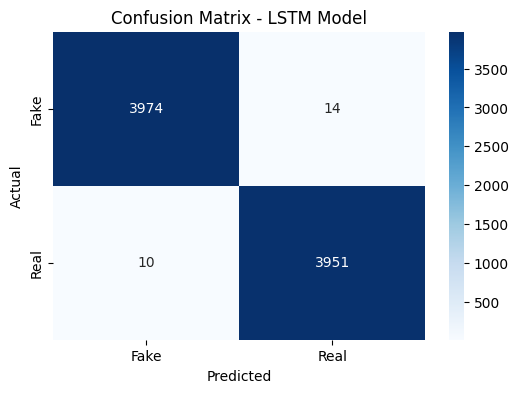

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_lstm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix - LSTM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [42]:
model.save("lstm_modelNEWS.h5")
print("\nLSTM Model Saved Successfully!")


LSTM Model Saved Successfully!


In [ ]:
import pickle

# Save the tokenizer
with open("tokenizer.pkl", "wb") as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
